In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dppy.multivariate_jacobi_ope import MultivariateJacobiOPE

# The .plot() method outputs smtg only in dimension d=1 or 2

# Number of points / dimension
N, d = 1000, 2
# Jacobi parameters in [-0.5, 0.5]^{d x 2}
jac_params = np.zeros((d, 2))

dpp = MultivariateJacobiOPE(N, jac_params)

samples = []

# Get an exact sample
for i in range(100):
    samples.append(
        dpp.sample()
    )

(1000, 2)


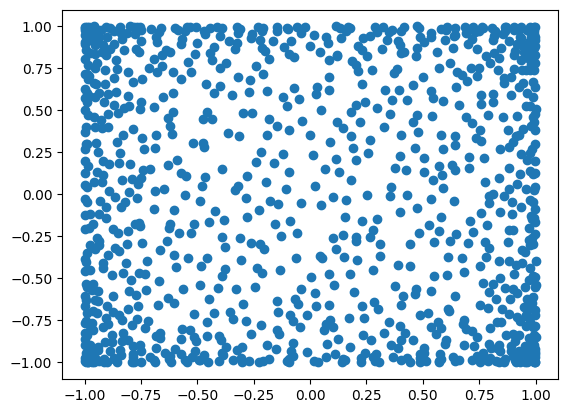

In [2]:
print(samples[0].shape)
plt.plot(samples[0][:,0], samples[0][:,1], 'o')

In [2]:

statistics = {}
statistics["uniform"] = []
statistics["dpp"] = []

sigma = .3

#f = lambda x: np.exp(-np.linalg.norm(x)**2/2/sigma**2)
#integral = np.sqrt(2*np.pi)**d * sigma**d
f = lambda x: np.prod(np.cos(np.pi*x)**3*np.sin(np.pi*x))
integral = 0

for sample in samples:
    weights = 1. / dpp.K(sample, eval_pointwise=True)
    statistics["dpp"].append( 
                    np.sum(
                          weights * np.array([f(x) for x in sample])
                    ) - integral
    )
    statistics["uniform"].append(
                    2**d * np.mean(
                        np.array([f(2*x-1) for x in np.random.rand(N,d)])
                    ) - integral
    )

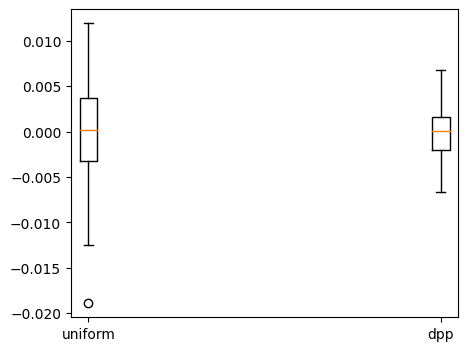

In [3]:
import matplotlib.pyplot as plt
mc_results = [statistics["uniform"],statistics["dpp"] ]
labels = ["uniform", "dpp"]
fix, ax = plt.subplots(figsize=(5,4))
ax.boxplot(x=mc_results, positions = [10, 20], labels=labels)
plt.show()

In [4]:
print(np.std(statistics["uniform"]), np.std(statistics["dpp"]))

0.005537754491542696 0.00273901839048725


In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
fix, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
sns.violinplot(x=statistics["uniform"], ax=ax[0])
sns.violinplot(x=statistics["dpp"], ax=ax[1])
plt.show()